In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

In [5]:
path = r'C:\Users\adm.m.gosciniak\Desktop\workspace\ANN-ML\beta_simulator_windows\dane\driving_log.csv'
df = pd.read_csv(path, names=['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,0.0,0.0,0.0,0.000004
1,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,0.0,0.0,0.0,0.000029
2,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,0.0,0.0,0.0,0.000005
3,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,0.0,0.0,0.0,0.000006
4,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,C:\Users\adm.m.gosciniak\Desktop\workspace\ANN...,0.0,0.0,0.0,0.000011


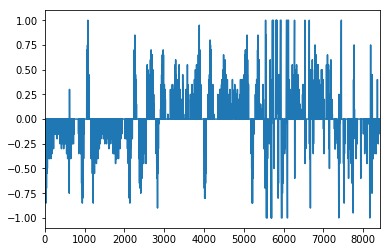

In [6]:
df['steering_angle'].plot()

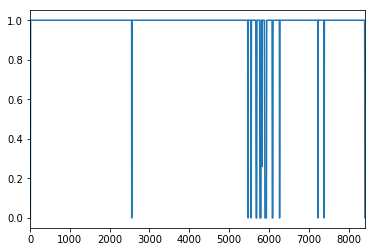

In [8]:
df['throttle'].plot()

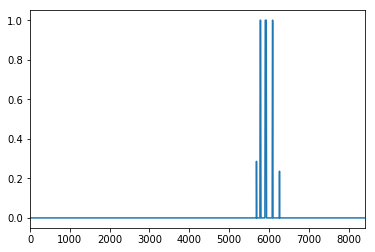

In [9]:
df['break'].plot()

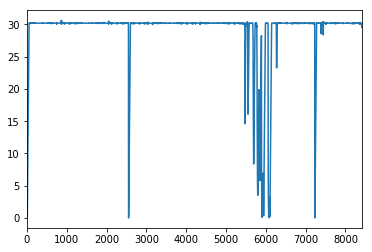

In [10]:
df['speed'].plot()

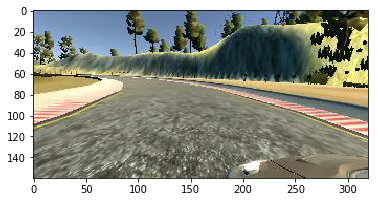

In [12]:
img = Image.open(df['left'][0])
plt.imshow(img)

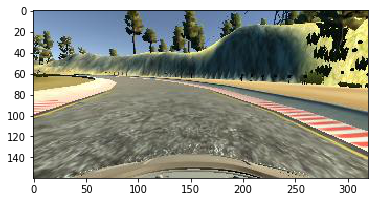

In [13]:
img = Image.open(df['center'][0])
plt.imshow(img)

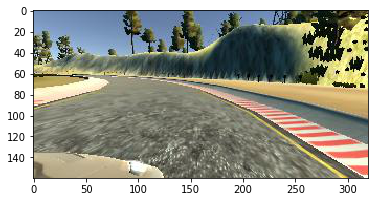

In [14]:
img = Image.open(df['right'][0])
plt.imshow(img)

In [17]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [19]:
def loadImage(fname):
    return np.asarray(Image.open(fname))
def processImage(img):
    return img[10:130:2, ::4, :]

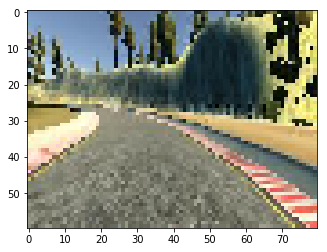

In [21]:
img = processImage(loadImage(df['center'][0]))
plt.imshow(img)

In [24]:
X = [processImage(loadImage(fname)) for fname in df['center']]
X += [processImage(loadImage(fname)) for fname in df['left']]
X += [processImage(loadImage(fname)) for fname in df['right']]

y = np.array(df['steering_angle'])
y = np.concatenate([y, y+0.4, y-0.4])

In [25]:
X = np.array(X)
print(X.shape)
print(y.shape)

(25236, 60, 80, 3)
(25236,)


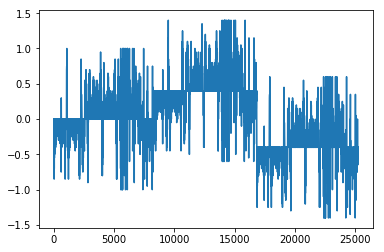

In [26]:
plt.plot(y)
plt.show()

In [28]:
np.save('beta_simulator_windows\X.npy', X)
np.save('beta_simulator_windows\y.npy', y)